<a href="https://colab.research.google.com/github/cybermin/2021_PNUAC_AIData/blob/main/11_codelab6_scikitlearn_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🏷️ **코랩 환경에서 한글 폰트 사용하기**


---


In [1]:
#한글 폰트 사용설치
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

#한글 폰트 추가
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

#그래프에서 마이너스 기호가 표시
plt.rcParams['axes.unicode_minus'] = False  

import warnings
warnings.filterwarnings('ignore')

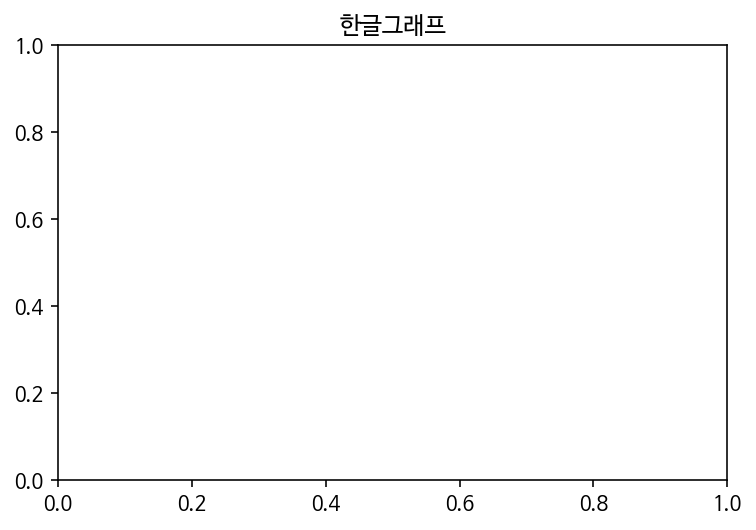

In [3]:
plt.title('한글그래프')
plt.show()

# **사이킷런(Scikit-learn)**
+ https://scikit-learn.org/stable/
+ https://github.com/amueller/odscon-2015
+ 사용하기 쉬운 파아썬 머신러닝 라이브러리
+ 데이터 전처리, 세부조정, 모델 평가, 분류 알고리즘 등을, 간편한 API로 제공
+ 사이킷런을 이용한 머신러닝 과정
  + 1.데이터 불러오기 : 기존데이터 pandas 활용, 샘플데이터 scikit-learn 활용
      + EDA(탐색적 데이터분석) : pandas, matplotlib, seaborn 활용
  + 2.train data와 test data 분리 : scikit-learn 활용
  + 3.모델링 : scikit-learn 활용
  + 4.모델평가 : scikit-learn 활용

&#9997; **사이킷런 주요 모듈**


---
| 모듈 | 설명 |
|------|------|
| `sklearn.datasets` | 내장된 예제 데이터 세트 |
| `sklearn.preprocessing` | 다양한 데이터 전처리 기능 제공 (변환, 정규화, 스케일링 등) |
| `sklearn.feature_selection` | 특징(feature)를 선택할 수 있는 기능 제공 | 
| `sklearn.feature_extraction` | 특징(feature) 추출에 사용 |
| `sklearn.decomposition` | 차원 축소 관련 알고리즘 지원 (PCA, NMF, Truncated SVD 등)
| `sklearn.model_selection` | 교차 검증을 위해 데이터를 학습/테스트용으로 분리, 최적 파라미터를 추출하는 API 제공 (GridSearch 등)
| `sklearn.metrics` | 분류, 회귀, 클러스터링, Pairwise에 대한 다양한 성능 측정 방법 제공 (Accuracy, Precision, Recall, ROC-AUC, RMSE 등) |
| `sklearn.pipeline` | 특징 처리 등의 변환과 ML 알고리즘 학습, 예측 등을 묶어서 실행할 수 있는 유틸리티 제공 |
| `sklearn.linear_model` | 선형 회귀, 릿지(Ridge), 라쏘(Lasso), 로지스틱 회귀 등 회귀 관련 알고리즘과 SGD(Stochastic Gradient Descent) 알고리즘 제공 |
| `sklearn.svm` | 서포트 벡터 머신 알고리즘 제공 |
| `sklearn.neighbors` | 최근접 이웃 알고리즘 제공 (k-NN 등)
| `sklearn.naive_bayes` | 나이브 베이즈 알고리즘 제공 (가우시안 NB, 다항 분포 NB 등) |
| `sklearn.tree` | 의사 결정 트리 알고리즘 제공 |
| `sklearn.ensemble` | 앙상블 알고리즘 제공 (Random Forest, AdaBoost, GradientBoost 등) |
| `sklearn.cluster` | 비지도 클러스터링 알고리즘 제공 (k-Means, 계층형 클러스터링, DBSCAN 등)


---



## **데이터 불러오기**
 

In [4]:
import pandas as pd

In [7]:
dflow = pd.read_csv('/content/drive/MyDrive/2021_AI/data/등록금eda.csv')
dflow.head(2)

,기준연도,학교종류,설립구분,지역,상태,학교,입학금,수업료,등록금,인문사회,자연과학,예체능,공학,의학,온라인,사립구분
0,2019,대학교,사립,경남,기존,가야대학교(김해),360000.0,6717700.0,6717700.0,5973300.0,7198400.0,NaN,NaN,NaN,off,사립
1,2019,대학교,사립,경기,기존,가천대학교,601000.0,8232500.0,8232500.0,7104500.0,8274800.0,9173100.0,9076000.0,9768000.0,off,사립


In [8]:
df = dflow.loc[:,['등록금','인문사회', '자연과학','예체능','공학','사립구분']]

### **EDA(탐색적 데이터분석)**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   등록금     720 non-null    float64
 1   인문사회    682 non-null    float64
 2   자연과학    546 non-null    float64
 3   예체능     548 non-null    float64
 4   공학      509 non-null    float64
 5   사립구분    717 non-null    object 
dtypes: float64(5), object(1)
memory usage: 33.9+ KB


#### 결측치 데이터 처리

In [10]:
import seaborn as sns

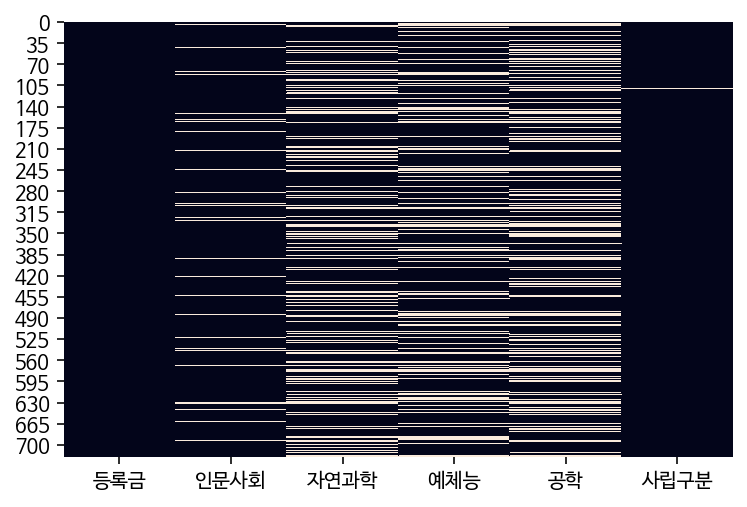

In [11]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [12]:
df = df.dropna()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 1 to 717
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   등록금     391 non-null    float64
 1   인문사회    391 non-null    float64
 2   자연과학    391 non-null    float64
 3   예체능     391 non-null    float64
 4   공학      391 non-null    float64
 5   사립구분    391 non-null    object 
dtypes: float64(5), object(1)
memory usage: 21.4+ KB


#### 범주형 자료 수치화

In [ ]:
df['사립구분'] = df['사립구분'].map({'사립':1, '국공립':0}) 


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 1 to 717
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   등록금     391 non-null    float64
 1   인문사회    391 non-null    float64
 2   자연과학    391 non-null    float64
 3   예체능     391 non-null    float64
 4   공학      391 non-null    float64
 5   사립구분    391 non-null    object 
dtypes: float64(5), object(1)
memory usage: 21.4+ KB


#### 데이터 분포확인

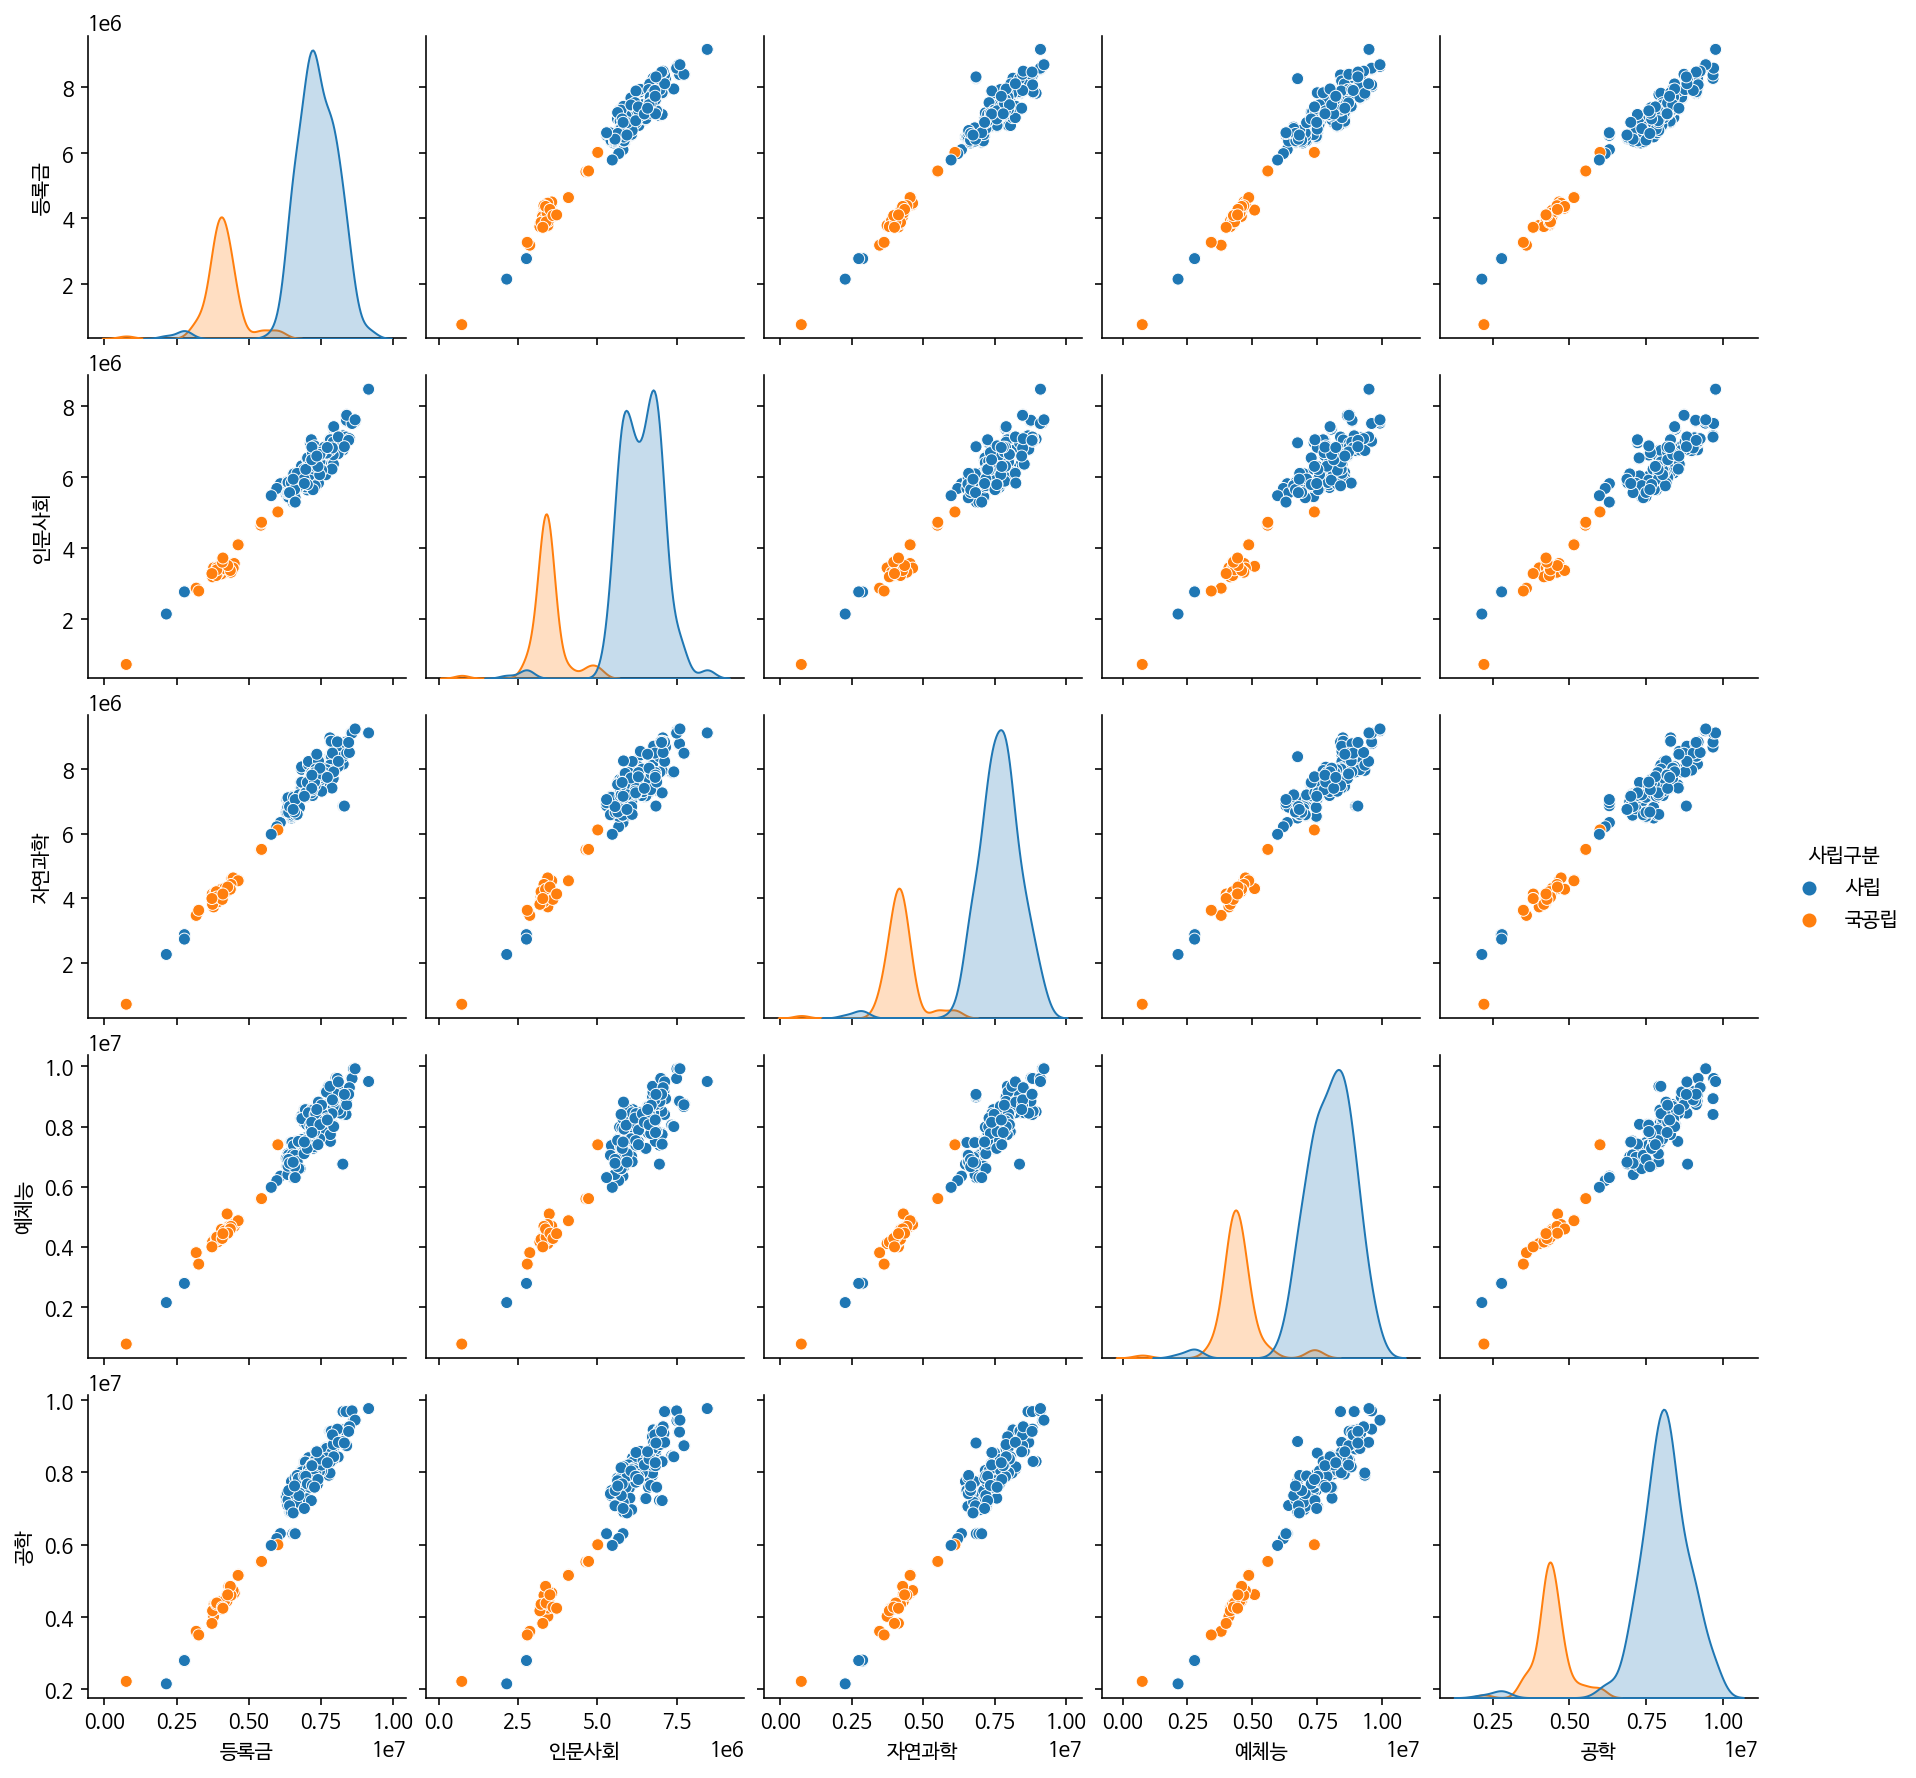

In [15]:
sns.pairplot(data=df, hue='사립구분')
plt.show()

## **모델링 및 평가 : scikit-learn 활용**


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, '등록금':'인문사회'], df['사립구분'], random_state=0)

In [18]:
X_train.shape

(293, 2)

In [19]:
y_train.shape

(293,)

In [20]:
X_test.shape

(98, 2)

#### 분류모델
+ 등록금 정보를 이용하여 사립학교인지 아닌지를 분류하시오.

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

1.0

In [22]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9795918367346939

In [23]:
X_test[:1]

,등록금,인문사회
100,7664100.0,6757800.0


In [24]:
dt.predict([[3182800.0,2874000.0]])

array(['국공립'], dtype=object)

In [25]:
dt.predict([[7182800.0,5874000.0]])

array(['사립'], dtype=object)

#### 회귀모델


In [28]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, ['사립구분','인문사회']], df['등록금'], random_state=0)

In [29]:
from sklearn.linear_model import LinearRegression 

lr = LinearRegression()    
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

ValueError: ignored

In [30]:
X_test[:1]

,사립구분,인문사회
100,사립,6757800.0


In [31]:
y_test[:1]

100    7664100.0
Name: 등록금, dtype: float64

In [32]:
lr.predict([[0,2874000.0 ]])

NotFittedError: ignored